In [52]:
import json
import pandas as pd
import PIL
import numpy as np
import os
from pycocotools.coco import COCO
from easyimages.utils import xyxy2xywh, change_box_order, visualize_one_coco,vis_image
%matplotlib inline

In [53]:
'''
usage: generate-shapes.py [-h] -n NUMBER [--width WIDTH] [--height HEIGHT]
              [--max-shapes MAX_SHAPES] [--min-shapes MIN_SHAPES]
              [--min-dimension MIN_DIMENSION] [--max-dimension MAX_DIMENSION]
              [--min-intensity MIN_INTENSITY] [--gray]
              [--shape {rectangle,circle,triangle}] [-o OUTPUT_DIR]
              [--allow-overlap]

Generate Toy Object Detection Dataset

optional arguments:
  -h, --help            show this help message and exit
  -n NUMBER, --number NUMBER
                        The number of images to generate
  --width WIDTH         The width of generated images (128)
  --height HEIGHT       The height of generated images (128)
  --max-shapes MAX_SHAPES
                        The maximum number of shapes per image (10)
  --min-shapes MIN_SHAPES
                        The maximum number of shapes per image (1)
  --min-dimension MIN_DIMENSION
                        The minimum dimension of a shape (10)
  --max-dimension MAX_DIMENSION
                        The maximum dimension of a shape (None)
  --min-intensity MIN_INTENSITY
                        The minimum intensity (0-255) for a pixel channel
                        (128)
  --gray                Make all shapes grayscale
  --shape {rectangle,circle,triangle}
                        Generate only this kind of shape
  -o OUTPUT_DIR, --output-dir OUTPUT_DIR
                        The output directory where to save images
  --allow-overlap       Allow shapes to overlap on images

'''


'\nusage: generate-shapes.py [-h] -n NUMBER [--width WIDTH] [--height HEIGHT]\n              [--max-shapes MAX_SHAPES] [--min-shapes MIN_SHAPES]\n              [--min-dimension MIN_DIMENSION] [--max-dimension MAX_DIMENSION]\n              [--min-intensity MIN_INTENSITY] [--gray]\n              [--shape {rectangle,circle,triangle}] [-o OUTPUT_DIR]\n              [--allow-overlap]\n\nGenerate Toy Object Detection Dataset\n\noptional arguments:\n  -h, --help            show this help message and exit\n  -n NUMBER, --number NUMBER\n                        The number of images to generate\n  --width WIDTH         The width of generated images (128)\n  --height HEIGHT       The height of generated images (128)\n  --max-shapes MAX_SHAPES\n                        The maximum number of shapes per image (10)\n  --min-shapes MIN_SHAPES\n                        The maximum number of shapes per image (1)\n  --min-dimension MIN_DIMENSION\n                        The minimum dimension of a shape (10)

In [54]:
# !pip3 install scipy==0.17.0
# !rm -r out/
# !python generate_shapes.py  --allow-overlap --min-dimension 50 --max-dimension 100 --number 1000 --output-dir out50_100 --width 300 --height 300
!python generate_shapes.py  --allow-overlap --min-dimension 100 --max-dimension 200 --number 1000 --output-dir out100_200 --width 300 --height 300

Generated 1000 images in 3.41s
Saving to /home/i008/googledrive/dsr-pytorch/generate-shapes/out100_200 ...


In [55]:
cat_dict = {'circle': 0,'triangle':1, 'rectangle': 2}

categories = []
for name,i in cat_dict.items():
    categories.append({'supercategory':'none','id':i,'name':name})

In [56]:
images_base_path = 'out100_200/'
B = json.load(open('out100_200/labels.json','rb'))

coco_template = {'annotations': [], 'images': [], 'info': 'bbox_encoding=top-left-widht-height', 'categories': []}
coco_template['categories'] = categories
for i,image in enumerate(B):
    image_name = str(i)+'.png'
    image_path = os.path.join(images_base_path, image_name)
    width, height = PIL.Image.open(image_path).size
    
    coco_template['images'].append({'id': image_name, 'file_name': image_name, 'width':width, 'height':height})
    
    for ib, box in enumerate(image['boxes']):
        x1,y1,x2,y2,cls = box['x1'], box['y1'], box['x2'], box['y2'], cat_dict[box['class']]
        box = np.array([[x1,y1,x2,y2]])
        boxcwh = change_box_order(box, input_order='tlbr',output_order='tlwh')[0]
        one_box = {'id':str(i)+'_'+str(ib), 'image_id': image_name, 'category_id': cls, 'bbox': np.ndarray.tolist(boxcwh)}
        coco_template['annotations'].append(one_box)

In [57]:
# from easyimages.utils import *

with open('100_200.json','w') as bla:
    bla.write(json.dumps(coco_template))
coco = COCO('100_200.json')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


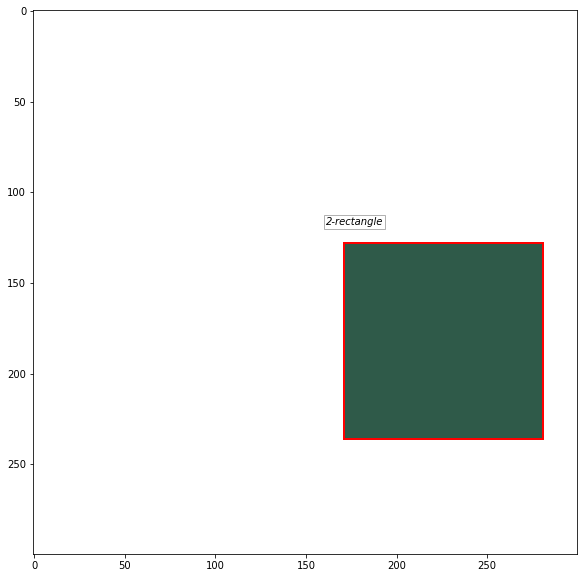

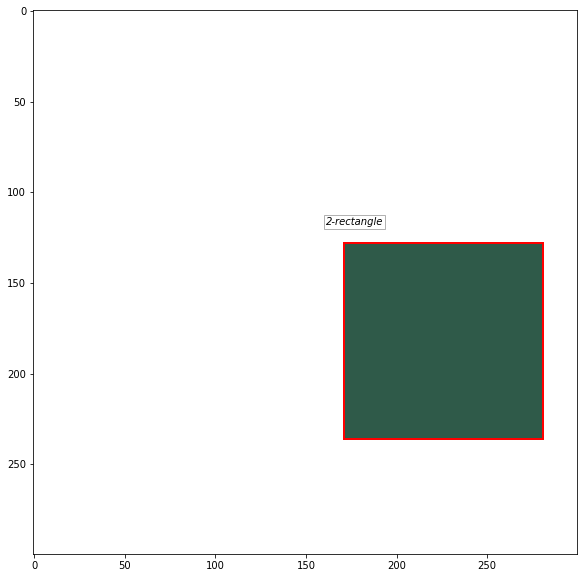

In [58]:
coco = COCO(annotation_file='100_200.json')
visualize_one_coco(coco, base_path='out100_200/')

In [19]:
coco.getAnnIds(['10.png'])

['10_0']

In [28]:
import torch

torch.save(%m)

In [51]:
!cp 100_200.json out100_200/